In [2]:
import os

os.chdir(r"D:\MACHINE_LEARNING\faces\SCUT-FBP5500_v2\train_test_files")

In [12]:
f = open("All_labels.txt")

In [13]:
img_label_list = f.read().split('\n')

In [14]:
img_label_list

['CF437.jpg 2.883333',
 'AM1384.jpg 2.466667',
 'AM1234.jpg 2.15',
 'AM1774.jpg 3.75',
 'CF215.jpg 3.033333',
 'AF1899.jpg 2.916667',
 'AM704.jpg 2.483333',
 'AM1172.jpg 2.266667',
 'CM434.jpg 3.033333',
 'CF228.jpg 2.75',
 'AF1179.jpg 3.933333',
 'AF64.jpg 2.3',
 'AM230.jpg 2.25',
 'AF734.jpg 2.95',
 'AF280.jpg 2.583333',
 'AF1705.jpg 3.133333',
 'CF54.jpg 2.45',
 'AM1931.jpg 3.833333',
 'CM126.jpg 2.883333',
 'AM550.jpg 2.466667',
 'AF915.jpg 3.166667',
 'AM765.jpg 2.716667',
 'AF1934.jpg 2.45',
 'AM1090.jpg 2.166667',
 'AF1142.jpg 2.666667',
 'AF1883.jpg 3.133333',
 'AM1923.jpg 2.433333',
 'AF1649.jpg 3.283333',
 'CF23.jpg 4.166667',
 'AF505.jpg 2.683333',
 'CF318.jpg 2.45',
 'AF791.jpg 2.683333',
 'AM346.jpg 2.583333',
 'AM1898.jpg 2.516667',
 'AM1247.jpg 2.1',
 'AF1544.jpg 3.033333',
 'AF1217.jpg 3.216667',
 'CM261.jpg 2.666667',
 'AM486.jpg 2.416667',
 'AM673.jpg 2.9',
 'CM704.jpg 2.8',
 'CF173.jpg 2.633333',
 'AF538.jpg 3.133333',
 'CF600.jpg 4.2',
 'CF254.jpg 2.966667',
 'CM381

In [16]:
os.chdir(r"D:\MACHINE_LEARNING\faces\SCUT-FBP5500_v2\Images")

In [20]:
img_label_list = [i.split(" ") for i in img_label_list]

In [21]:
img_label_list

[['CF437.jpg', '2.883333'],
 ['AM1384.jpg', '2.466667'],
 ['AM1234.jpg', '2.15'],
 ['AM1774.jpg', '3.75'],
 ['CF215.jpg', '3.033333'],
 ['AF1899.jpg', '2.916667'],
 ['AM704.jpg', '2.483333'],
 ['AM1172.jpg', '2.266667'],
 ['CM434.jpg', '3.033333'],
 ['CF228.jpg', '2.75'],
 ['AF1179.jpg', '3.933333'],
 ['AF64.jpg', '2.3'],
 ['AM230.jpg', '2.25'],
 ['AF734.jpg', '2.95'],
 ['AF280.jpg', '2.583333'],
 ['AF1705.jpg', '3.133333'],
 ['CF54.jpg', '2.45'],
 ['AM1931.jpg', '3.833333'],
 ['CM126.jpg', '2.883333'],
 ['AM550.jpg', '2.466667'],
 ['AF915.jpg', '3.166667'],
 ['AM765.jpg', '2.716667'],
 ['AF1934.jpg', '2.45'],
 ['AM1090.jpg', '2.166667'],
 ['AF1142.jpg', '2.666667'],
 ['AF1883.jpg', '3.133333'],
 ['AM1923.jpg', '2.433333'],
 ['AF1649.jpg', '3.283333'],
 ['CF23.jpg', '4.166667'],
 ['AF505.jpg', '2.683333'],
 ['CF318.jpg', '2.45'],
 ['AF791.jpg', '2.683333'],
 ['AM346.jpg', '2.583333'],
 ['AM1898.jpg', '2.516667'],
 ['AM1247.jpg', '2.1'],
 ['AF1544.jpg', '3.033333'],
 ['AF1217.jpg', '3.2

In [27]:
import cv2

IMG_SIZE = 64
img_array = cv2.imread(img_label_list[0][0])
img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
print(img_array[20][20])

[ 70  92 143]


In [31]:
data = []
for img_rating in img_label_list:
    try:
        img_array = cv2.imread(img_rating[0])
        img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        data.append([img_array/255.0, img_rating[1]])
    except Exception as e:
        pass

In [36]:
data[0][0][20][20]

array([0.2745098 , 0.36078431, 0.56078431])

In [37]:
len(data)

5500

In [39]:
import random
random.shuffle(data)

In [40]:
data[0][0][20][20]

array([0.24705882, 0.31764706, 0.70588235])

In [41]:
train_data = data[:5000]
test_data = data[5000:]

In [82]:
X = []
y = []

for image, rating in train_data:
    X.append(image)
    y.append(float(rating))
    

In [97]:
y

array([3.183333, 3.933333, 2.15    , ..., 2.5     , 2.466667, 4.116667])

In [83]:
type(X)

list

In [96]:
import numpy as np

X = np.array(X)
y = np.array(y)

In [85]:
type(X)

numpy.ndarray

In [86]:
print(X.shape)

(5000, 64, 64, 3)


In [87]:
import matplotlib.pyplot as plt

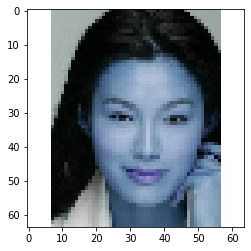

In [88]:
plt.imshow(data[1000][0])

In [89]:
input_shape = (IMG_SIZE, IMG_SIZE, 3)

In [90]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, Input, Flatten, Dense, Reshape
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50


In [91]:
resnet = ResNet50(include_top=False, pooling='avg')
model = Sequential()
model.add(resnet)
model.add(Dense(1))
model.layers[0].trainable = False

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2049      
Total params: 23,589,761
Trainable params: 2,049
Non-trainable params: 23,587,712
_________________________________________________________________
None


In [120]:
model.compile(loss='mean_squared_error', optimizer=Adam())

In [121]:
model.fit(batch_size=10, x=X, y=y, epochs=30)

Epoch 1/30
500/500 [==============================] - 19s 31ms/step - loss: 0.2903
Epoch 2/30
500/500 [==============================] - 15s 31ms/step - loss: 0.2904
Epoch 3/30
500/500 [==============================] - 15s 31ms/step - loss: 0.2938
Epoch 4/30
500/500 [==============================] - 15s 31ms/step - loss: 0.2901
Epoch 5/30
500/500 [==============================] - 15s 31ms/step - loss: 0.2896
Epoch 6/30
500/500 [==============================] - 15s 30ms/step - loss: 0.2865
Epoch 7/30
500/500 [==============================] - 15s 31ms/step - loss: 0.2885
Epoch 8/30
500/500 [==============================] - 15s 30ms/step - loss: 0.2872
Epoch 9/30
500/500 [==============================] - 15s 31ms/step - loss: 0.2861
Epoch 10/30
500/500 [==============================] - 15s 31ms/step - loss: 0.2855
Epoch 11/30
500/500 [==============================] - 15s 31ms/step - loss: 0.2889
Epoch 12/30
500/500 [==============================] - 15s 31ms/step - loss: 0.2843
E

In [99]:
test_data

[[array([[[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
  
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
  
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
  
         ...,
  
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
  
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
  
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]]]),
  '2.1

In [122]:
X_test = []
y_test = []
for image, rating in test_data:
    X_test.append(image)
    y_test.append(rating)

In [123]:
X_test = np.array(X_test)

In [124]:
for count, img in enumerate(X_test):
    print(model.predict(img.reshape(-1,IMG_SIZE,IMG_SIZE,3)), " -> ", y_test[count])

[[2.8989]]  ->  2.166667
[[3.315778]]  ->  2.7
[[3.0843468]]  ->  2.65
[[2.483179]]  ->  2.6
[[2.6634402]]  ->  2.733333
[[3.1651626]]  ->  3.466667
[[2.7301536]]  ->  1.15
[[2.842104]]  ->  4.316667
[[4.0456986]]  ->  4.333333
[[2.5949965]]  ->  2.95
[[2.6866121]]  ->  2.766667
[[2.689145]]  ->  2.516667
[[3.2624302]]  ->  4.1
[[2.4679587]]  ->  2.866667
[[3.568685]]  ->  1.95
[[3.0483155]]  ->  3.75
[[2.5697548]]  ->  2.233333
[[3.3719835]]  ->  4.366667
[[3.586028]]  ->  4.316667
[[3.1513684]]  ->  2.433333
[[2.77614]]  ->  2.6
[[2.8213553]]  ->  2.216667
[[2.737488]]  ->  2.85
[[2.918776]]  ->  2.433333
[[3.0043285]]  ->  3.2
[[3.4431984]]  ->  3.966667
[[3.492261]]  ->  2.85
[[3.4732013]]  ->  3.983333
[[2.6975152]]  ->  2.683333
[[3.5782096]]  ->  3.933333
[[3.3888547]]  ->  3.2
[[3.2020035]]  ->  3.433333
[[2.9797287]]  ->  2.783333
[[3.5476196]]  ->  4.016667
[[3.6587138]]  ->  3.1
[[2.26394]]  ->  2
[[2.54158]]  ->  3.55
[[2.8933785]]  ->  2.766667
[[2.5396295]]  ->  2.666667


[[2.8208833]]  ->  3.233333
[[2.8732615]]  ->  2.383333
[[3.2800682]]  ->  2.75
[[2.162262]]  ->  2.316667
[[2.943411]]  ->  2.916667
[[2.6264653]]  ->  2.3
[[3.2192683]]  ->  3.9
[[3.2071157]]  ->  3.616667
[[2.510056]]  ->  2.866667
[[3.7031126]]  ->  4.15
[[3.6301003]]  ->  3.533333
[[2.6626732]]  ->  2.1
[[3.4048457]]  ->  3.233333
[[3.2499695]]  ->  2.466667
[[2.6147242]]  ->  2.166667
[[2.6555004]]  ->  2.75
[[3.541332]]  ->  4.5
[[2.7947454]]  ->  3.3
[[2.8317235]]  ->  2.416667
[[3.5438828]]  ->  4.016667
[[3.090503]]  ->  3
[[2.6245658]]  ->  2.633333
[[2.9138708]]  ->  3.95
[[2.835048]]  ->  2.8
[[2.5127656]]  ->  2.583333
[[3.138503]]  ->  3.45
[[2.599224]]  ->  2.383333
[[4.0128193]]  ->  3.85
[[4.3705835]]  ->  4.516667
[[3.5584474]]  ->  4.233333
[[3.047998]]  ->  3.533333
[[3.6793392]]  ->  4.316667
[[2.8998775]]  ->  3.3
[[2.9539382]]  ->  3.266667
[[2.5615525]]  ->  3.483333
[[2.7036607]]  ->  2.916667
[[2.7287323]]  ->  1.783333
[[4.104435]]  ->  4.016667
[[3.280053]]